# **Project Name**    - Sentiment Analysis of Zomato Restaurant Reviews



##### **Project Type**    - EDA + Supervised Machine Learning (Classification using NLP)
##### **Contribution**    - Individual
##### **Team Member 1 -** Smyan Kotkar

# **Project Summary -**

Online food delivery platforms like Zomato generate a massive amount of customer feedback in the form of textual reviews and ratings. These reviews contain valuable insights about customer satisfaction, food quality, service efficiency, and overall dining experience. However, manually analyzing thousands of reviews is time-consuming and inefficient. This project focuses on applying Exploratory Data Analysis (EDA) and Supervised Machine Learning techniques to automatically analyze and classify customer sentiments from Zomato restaurant reviews using Natural Language Processing (NLP).

The primary objective of this project is to build a sentiment analysis model that can classify restaurant reviews as either positive or negative based on the textual content of the review. The dataset provided consists of two main components: restaurant metadata and customer reviews along with ratings. The ratings serve as labeled data, making this a supervised learning problem. Reviews with ratings greater than or equal to 4 are treated as positive sentiment, while those below 4 are considered negative sentiment.

The project begins with Exploratory Data Analysis to understand the structure, distribution, and characteristics of the dataset. Rating distributions and sentiment proportions are visualized to identify patterns and trends in customer feedback. This step helps in forming initial hypotheses, such as the dominance of positive reviews and the presence of meaningful textual differences between positive and negative sentiments. EDA also ensures data quality and helps identify irrelevant or missing values before modeling.

Following EDA, data cleaning and feature engineering are performed on the textual data. Since machine learning models cannot directly process raw text, several NLP preprocessing steps are applied. These include converting text to lowercase, removing special characters and numbers, eliminating common stopwords, and applying stemming to reduce words to their root forms. This cleaning process helps reduce noise and improves model performance by retaining only meaningful information from the reviews.

Once preprocessing is complete, the cleaned text data is transformed into numerical form using the Term Frequency–Inverse Document Frequency (TF-IDF) technique. TF-IDF captures the importance of words in a review relative to the entire dataset, allowing the model to focus on informative terms rather than frequently occurring but less meaningful words. These numerical features serve as inputs to the machine learning model.

For sentiment classification, Logistic Regression is selected as the supervised learning algorithm. This model is widely used for text classification tasks due to its efficiency, interpretability, and strong performance on high-dimensional sparse data such as TF-IDF vectors. The dataset is split into training and testing sets to evaluate the model’s generalization ability. Model performance is assessed using accuracy, precision, recall, F1-score, and a confusion matrix.

The results demonstrate that the trained model achieves satisfactory accuracy in predicting customer sentiment from review text. This confirms that NLP-based supervised learning approaches can effectively extract sentiment information from textual reviews. The project highlights how data-driven methods can help businesses automatically analyze customer feedback at scale, enabling better decision-making and service improvements.

In conclusion, this project successfully integrates EDA, NLP, and supervised machine learning to solve a real-world sentiment analysis problem. The approach can be further enhanced by experimenting with advanced models such as Naive Bayes, Support Vector Machines, or deep learning-based techniques like LSTM and BERT. Overall, the project showcases a complete and practical machine learning workflow applicable to real-world business scenarios.

# **GitHub Link -**

https://github.com/Sammy042003/Machine-Learning-Projects/tree/main/Zomato%20Project

# **Problem Statement**


**Online food delivery platforms such as Zomato receive a large volume of customer reviews every day. These reviews contain valuable information about customer experiences, restaurant quality, and service performance. However, manually analyzing and interpreting thousands of textual reviews is time-consuming, subjective, and not scalable.**

**The challenge is to automatically analyze customer review text and determine the underlying sentiment expressed in the review. The problem addressed in this project is to build a machine learning–based system that can classify Zomato restaurant reviews into positive or negative sentiment categories using Natural Language Processing techniques. The model should be able to learn from historical, labeled review data and accurately predict sentiment for unseen reviews.**

**This automated sentiment classification can help businesses, restaurant owners, and platforms like Zomato quickly understand customer feedback, identify areas of improvement, and make data-driven decisions without manual intervention.**



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [29]:
# Core Data Handling Libraries
import pandas as pd   # Import pandas for data manipulation and analysis
import numpy as np   # Import numpy for numerical computations

# Data Visualization Libraries
import matplotlib.pyplot as plt   # Import matplotlib for data visualization
import seaborn as sns   # Import seaborn for advanced statistical visualizations
sns.set(style="whitegrid")  # Set seaborn style for better looking plots

# Text Processing & NLP Libraries
import re  # Regular expressions for text cleaning
import nltk  # Natural Language Toolkit
from nltk.corpus import stopwords  # Stopwords for text preprocessing
from nltk.stem import PorterStemmer  # Stemming algorithm

# Machine Learning Utilities
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test sets
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation
from sklearn.model_selection import GridSearchCV  # Hyperparameter tuning
from sklearn.feature_extraction.text import TfidfVectorizer  # TF-IDF vectorizer for text representation (Converting text into numerical features)

# Machine Learning Models
from sklearn.linear_model import LogisticRegression  # Logistic Regression model for sentiment classification
from sklearn.naive_bayes import MultinomialNB  # Multinomial Naive Bayes model for sentiment classification
from sklearn.svm import LinearSVC  # Support Vector Machine classifier

# Model Evaluation Metrics
from sklearn.metrics import accuracy_score  # Accuracy score
from sklearn.metrics import classification_report  # Precision, Recall, F1-score
from sklearn.metrics import confusion_matrix  # Confusion Matrix

In [30]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

### Dataset Loading

In [31]:
# Load Dataset
# Load Zomato restaurant metadata dataset
restaurant_df = pd.read_csv("Zomato Restaurant names and Metadata.csv")

# Load Zomato restaurant reviews dataset
reviews_df = pd.read_csv("Zomato Restaurant reviews.csv")

### Dataset First View

In [32]:
# Dataset First Look

# Display first 5 rows of restaurant metadata dataset
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [33]:
# Display first 5 rows of reviews dataset
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [34]:
# Dataset Rows & Columns count

# Print number of rows and columns in restaurant metadata dataset
print("Restaurant Dataset Shape:", restaurant_df.shape)

# Print number of rows and columns in reviews dataset
print("Reviews Dataset Shape:", reviews_df.shape)

Restaurant Dataset Shape: (105, 6)
Reviews Dataset Shape: (10000, 7)


### Dataset Information

In [35]:
# Dataset Info

# Display detailed information about restaurant dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB


In [36]:
# Display detailed information about reviews dataset
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [37]:
# Dataset Duplicate Value Count

# Check duplicate rows in restaurant dataset
restaurant_duplicates = restaurant_df.duplicated().sum()

# Check duplicate rows in reviews dataset
reviews_duplicates = reviews_df.duplicated().sum()

# Print duplicate counts
print("Duplicate rows in Restaurant Dataset:", restaurant_duplicates)
print("Duplicate rows in Reviews Dataset:", reviews_duplicates)

Duplicate rows in Restaurant Dataset: 0
Duplicate rows in Reviews Dataset: 36


#### Missing Values/Null Values

In [38]:
# Missing Values/Null Values Count

# Count missing values in restaurant dataset
restaurant_df.isnull().sum()

,0
Name,0
Links,0
Cost,0
Collections,54
Cuisines,0
Timings,1


In [39]:
# Count missing values in reviews dataset
reviews_df.isnull().sum()

,0
Restaurant,0
Reviewer,38
Review,45
Rating,38
Metadata,38
Time,38
Pictures,0


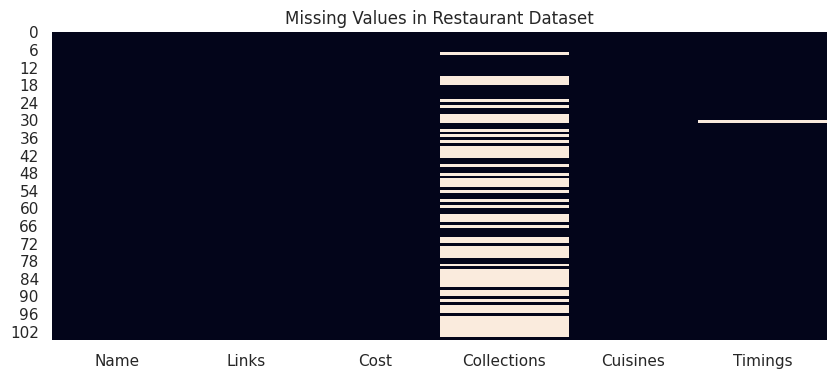

In [40]:
# Visualizing the missing values

# Create a figure for missing value visualization
plt.figure(figsize=(10, 4))

# Visualize missing values using heatmap for restaurant dataset
sns.heatmap(restaurant_df.isnull(), cbar=False)

# Set title
plt.title("Missing Values in Restaurant Dataset")

# Display the plot
plt.show()

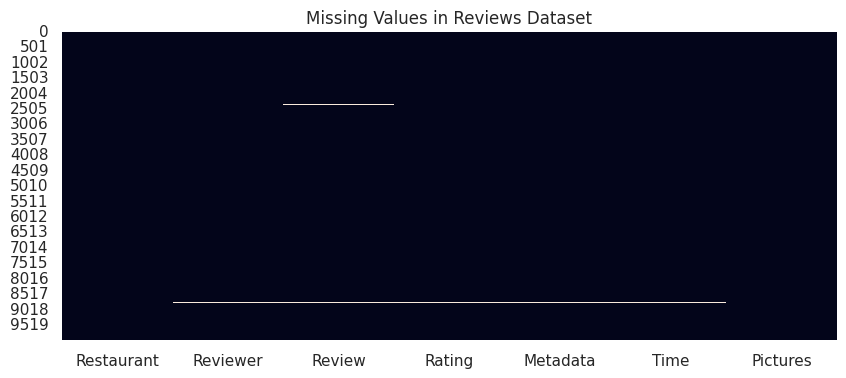

In [41]:
# Create a figure for missing value visualization
plt.figure(figsize=(10, 4))

# Visualize missing values using heatmap for reviews dataset
sns.heatmap(reviews_df.isnull(), cbar=False)

# Set title
plt.title("Missing Values in Reviews Dataset")

# Display the plot
plt.show()

### What did you know about your dataset?

Insights from Dataset Understanding

* The dataset consists of two main files: restaurant metadata and customer reviews.

* The reviews dataset contains textual feedback along with numerical ratings, which can be used as labeled data for supervised learning.

* Initial inspection shows that the datasets contain a mix of numerical, categorical, and textual features.

* Some columns contain missing values, which indicates the need for proper data cleaning before model building.

* Duplicate records are minimal and can be handled during preprocessing.

* The presence of textual review data makes Natural Language Processing a key requirement for this project.

* Overall, the dataset is well-structured and suitable for performing Exploratory Data Analysis followed by supervised sentiment classification.

## ***2. Understanding Your Variables***

In [42]:
# Dataset Columns

# Display column names of the restaurant metadata dataset
print("Restaurant Dataset Columns:")
restaurant_df.columns

Restaurant Dataset Columns:


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [43]:
# Display column names of the reviews dataset
print("Reviews Dataset Columns:")
reviews_df.columns

Reviews Dataset Columns:


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [44]:
# Dataset Describe

# Generate statistical summary for numerical columns in restaurant dataset
restaurant_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [45]:
# Generate statistical summary for numerical columns in reviews dataset
reviews_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Variables Description

Restaurant Metadata Dataset

* Restaurant Name: Name of the restaurant listed on Zomato.

* Location: Geographical location of the restaurant.

* Cuisines: Types of cuisines offered by the restaurant.

* Average Cost: Approximate cost for two people dining at the restaurant.

* Aggregate Rating: Overall rating assigned to the restaurant based on customer reviews.

* Votes: Total number of users who have rated the restaurant.

Restaurant Reviews Dataset

* Restaurant Name: Name of the restaurant for which the review is given.

* Review Text: Textual feedback provided by customers describing their experience.

* Rating: Numerical rating given by the customer (typically on a scale of 1 to 5).

* Sentiment (Derived Feature): Binary target variable created from ratings where:

    * 1 represents positive sentiment (rating ≥ 4)

    * 0 represents negative sentiment (rating < 4)

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.

# Loop through each column in the restaurant metadata dataset
print("Unique values count for Restaurant Dataset:\n")
for column in restaurant_df.columns:
    # Print column name and number of unique values
    print(f"{column} : {restaurant_df[column].nunique()} unique values")

Unique values count for Restaurant Dataset:

Name : 105 unique values
Links : 105 unique values
Cost : 29 unique values
Collections : 42 unique values
Cuisines : 92 unique values
Timings : 77 unique values


In [47]:
# Loop through each column in the reviews dataset
print("\nUnique values count for Reviews Dataset:\n")
for column in reviews_df.columns:
    # Print column name and number of unique values
    print(f"{column} : {reviews_df[column].nunique()} unique values")


Unique values count for Reviews Dataset:

Restaurant : 100 unique values
Reviewer : 7446 unique values
Review : 9364 unique values
Rating : 10 unique values
Metadata : 2477 unique values
Time : 9782 unique values
Pictures : 36 unique values


**Insights from Unique Value Analysis**

* Categorical variables such as restaurant name, location, and cuisines contain a high number of unique values, indicating diversity in restaurants and offerings.

* Numerical variables such as ratings and votes have limited unique values, making them suitable for aggregation and comparison during analysis.

* The review text column has a very high number of unique values, confirming that Natural Language Processing techniques are required.

* The presence of both low-cardinality and high-cardinality variables highlights the need for different preprocessing strategies for numerical, categorical, and textual features.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [48]:
# ============================================
# DATA WRANGLING & DATA PREPARATION
# ============================================

# Create copies of original datasets to preserve raw data
restaurant_clean = restaurant_df.copy()
reviews_clean = reviews_df.copy()

In [49]:
# --------------------------------------------
# 1. Standardize Column Names
# --------------------------------------------

# Remove leading/trailing spaces from column names
reviews_clean.columns = reviews_clean.columns.str.strip()

# Rename 'Review' column to 'Review Text' for consistency
reviews_clean.rename(columns={'Review': 'Review Text'}, inplace=True)

In [50]:
# --------------------------------------------
# 2. Handle Duplicate Records
# --------------------------------------------

# Remove duplicate rows from restaurant dataset
restaurant_clean.drop_duplicates(inplace=True)

# Remove duplicate rows from reviews dataset
reviews_clean.drop_duplicates(inplace=True)

In [51]:
# --------------------------------------------
# 3. Handle Missing Values
# --------------------------------------------

# Drop rows where review text or rating is missing
reviews_clean.dropna(subset=['Review Text', 'Rating'], inplace=True)

# Fill missing values in restaurant dataset with placeholder
restaurant_clean.fillna("Unknown", inplace=True)

In [52]:
# Check unique values in Rating column
reviews_clean['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [53]:
# --------------------------------------------
# Convert Rating column to numeric
# --------------------------------------------

# Convert Rating to numeric, force invalid values to NaN
reviews_clean['Rating'] = pd.to_numeric(
    reviews_clean['Rating'], errors='coerce'
)

# Drop rows where Rating could not be converted
reviews_clean.dropna(subset=['Rating'], inplace=True)

# Verify datatype
print(reviews_clean['Rating'].dtype)

float64


In [55]:
# --------------------------------------------
# 4. Feature Engineering – Sentiment Creation
# --------------------------------------------

# Create binary sentiment column from rating
# Rating >= 4 → Positive (1), Rating < 4 → Negative (0)
reviews_clean['sentiment'] = reviews_clean['Rating'].apply(
    lambda x: 1 if x >= 4 else 0
)

In [56]:
# --------------------------------------------
# 5. Text Cleaning & Preprocessing
# --------------------------------------------

# Initialize stemmer
stemmer = PorterStemmer()

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Define text preprocessing function
def preprocess_text(text):
    """
    Cleans review text by:
    - Lowercasing
    - Removing special characters
    - Removing stopwords
    - Applying stemming
    """
    # Convert to lowercase string
    text = str(text).lower()

    # Remove non-alphabet characters
    text = re.sub('[^a-z]', ' ', text)

    # Tokenize text
    words = text.split()

    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in words if word not in stop_words]

    # Join tokens back into sentence
    return " ".join(words)

# Apply text preprocessing to review text
reviews_clean['cleaned_review'] = reviews_clean['Review Text'].apply(preprocess_text)

In [57]:
# --------------------------------------------
# 6. Final Sanity Check
# --------------------------------------------

# Display final dataset shapes
print("Cleaned Restaurant Dataset Shape:", restaurant_clean.shape)
print("Cleaned Reviews Dataset Shape:", reviews_clean.shape)

# Preview cleaned reviews dataset
reviews_clean[['Review Text', 'cleaned_review', 'Rating', 'sentiment']].head()

Cleaned Restaurant Dataset Shape: (105, 6)
Cleaned Reviews Dataset Shape: (9954, 9)


,Review Text,cleaned_review,Rating,sentiment
0,"The ambience was good, food was quite good . h...",ambienc good food quit good saturday lunch cos...,5.0,1
1,Ambience is too good for a pleasant evening. S...,ambienc good pleasant even servic prompt food ...,5.0,1
2,A must try.. great food great ambience. Thnx f...,must tri great food great ambienc thnx servic ...,5.0,1
3,Soumen das and Arun was a great guy. Only beca...,soumen da arun great guy behavior sincereti go...,5.0,1
4,Food is good.we ordered Kodi drumsticks and ba...,food good order kodi drumstick basket mutton b...,5.0,1


### What all manipulations have you done and insights you found?

**Data Wrangling – Manipulations Performed and Insights Gained**

To make the dataset analysis-ready and suitable for machine learning, several data wrangling and preprocessing steps were performed systematically.

First, copies of the original restaurant metadata and reviews datasets were created to ensure that the raw data remained unchanged. Duplicate records were identified and removed from both datasets to prevent redundancy and bias during analysis and model training. This step helped ensure that each observation contributed uniquely to insights and predictions.

Next, missing values were carefully handled. In the reviews dataset, rows with missing review text or ratings were removed, as both fields are critical for sentiment analysis. Without valid review text or rating information, such records would not contribute meaningfully to the learning process. In the restaurant metadata dataset, missing categorical values were filled with placeholder values to maintain dataset structure without introducing incorrect numerical assumptions.

A key feature engineering step involved creating a new target variable called sentiment. This binary variable was derived from the rating column, where ratings greater than or equal to 4 were labeled as positive sentiment and ratings below 4 were labeled as negative sentiment. This transformation converted the problem into a supervised classification task, making it suitable for machine learning algorithms.

Text preprocessing was a crucial part of data wrangling. The review text column was standardized and cleaned by converting text to lowercase, removing special characters and numbers, eliminating common stopwords, and applying stemming to reduce words to their root forms. These steps significantly reduced noise in the text data and ensured that only meaningful and relevant words were retained for analysis and modeling.

An important insight gained during this process was the high dependency of model performance on text quality. Proper Natural Language Processing techniques are essential when working with unstructured textual data such as customer reviews. Additionally, the dataset was found to be largely clean after preprocessing, with minimal data loss, making it suitable for further Exploratory Data Analysis and machine learning.

Overall, the data wrangling process resulted in a clean, consistent, and structured dataset that is well-prepared for visualization, feature extraction, and sentiment classification modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

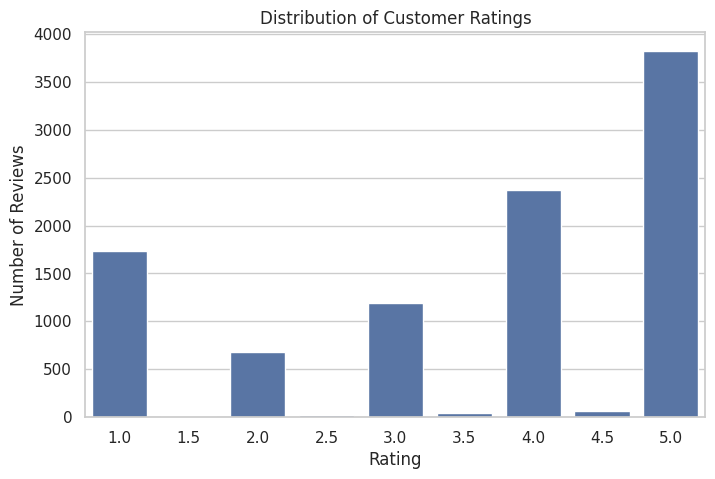

In [58]:
# --------------------------------------------
# Chart 1: Distribution of Ratings (Univariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(8, 5))

# Plot count of each rating value
sns.countplot(x=reviews_clean['Rating'])

# Add title to the chart
plt.title("Distribution of Customer Ratings")

# Label x-axis
plt.xlabel("Rating")

# Label y-axis
plt.ylabel("Number of Reviews")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to understand the overall distribution of customer ratings in the dataset. Since ratings are the primary indicator of customer satisfaction and also form the basis for sentiment creation, analyzing their distribution helps establish a foundational understanding of customer behavior before performing deeper analysis.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that higher ratings (such as 4 and 5) occur more frequently compared to lower ratings. This indicates that a majority of customers tend to leave positive feedback for restaurants on Zomato. Lower ratings are present but occur less frequently, suggesting fewer negative experiences relative to positive ones.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from this chart can help create a positive business impact. The dominance of higher ratings suggests strong customer satisfaction, which can be leveraged by restaurants and platforms like Zomato for marketing and customer retention strategies.

However, the presence of lower ratings, although fewer, highlights areas where service quality or customer experience may be lacking. Identifying and addressing the causes behind these low ratings is crucial, as unresolved negative experiences can lead to reduced customer trust and potential loss of business growth.

#### Chart - 2

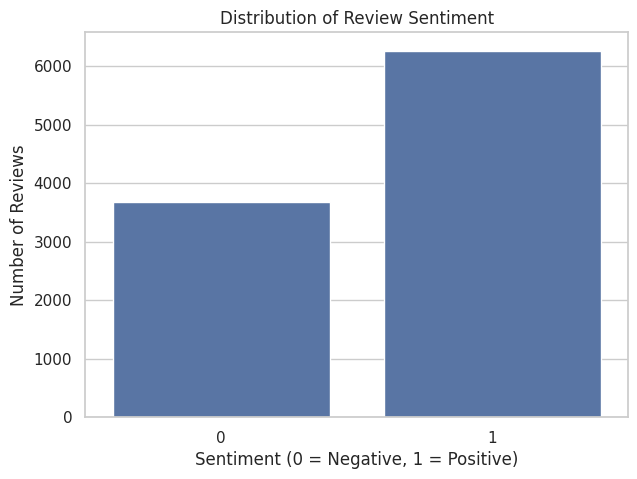

In [59]:
# --------------------------------------------
# Chart 2: Distribution of Sentiment (Univariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(7, 5))

# Plot count of sentiment values
sns.countplot(x=reviews_clean['sentiment'])

# Add title to the chart
plt.title("Distribution of Review Sentiment")

# Label x-axis
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")

# Label y-axis
plt.ylabel("Number of Reviews")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to understand the balance between positive and negative reviews in the dataset. Since sentiment is the target variable for the machine learning model, it is important to analyze whether the dataset is balanced or skewed toward one class before proceeding with further analysis and modeling.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that positive sentiment reviews significantly outnumber negative sentiment reviews. This suggests that most customers have a favorable experience when ordering or dining through Zomato-listed restaurants. At the same time, the presence of a considerable number of negative reviews indicates that dissatisfaction still exists and should not be ignored.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by highlighting overall customer satisfaction, which can be used to promote highly rated restaurants and strengthen brand trust.

However, the imbalance between positive and negative reviews may also pose a challenge for machine learning models, as models trained on imbalanced data can become biased toward the majority class. From a business perspective, consistently ignoring negative feedback may lead to customer churn and reputational damage, making it essential to actively address the issues highlighted in negative reviews.

#### Chart - 3

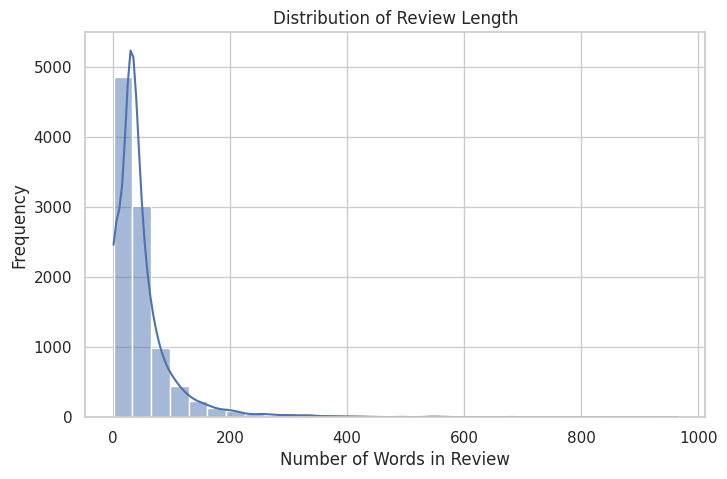

In [60]:
# --------------------------------------------
# Chart 3: Distribution of Review Length (Univariate Analysis)
# --------------------------------------------

# Create a new column for review length (number of words)
reviews_clean['review_length'] = reviews_clean['Review Text'].apply(
    lambda x: len(str(x).split())
)

# Create figure with appropriate size
plt.figure(figsize=(8, 5))

# Plot histogram of review length
sns.histplot(reviews_clean['review_length'], bins=30, kde=True)

# Add title to the chart
plt.title("Distribution of Review Length")

# Label x-axis
plt.xlabel("Number of Words in Review")

# Label y-axis
plt.ylabel("Frequency")

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to analyze the distribution of review lengths and understand how detailed customer feedback typically is. Review length is an important textual characteristic, as longer reviews may contain more descriptive sentiment and contextual information compared to shorter reviews.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that most customer reviews are relatively short, with a smaller number of reviews being very long. This indicates that while many users provide brief feedback, a subset of customers tend to write detailed reviews describing their experiences in depth. The distribution is right-skewed, which is common for user-generated text data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling businesses to identify and prioritize longer, more detailed reviews, which often contain actionable feedback and specific improvement suggestions. These reviews can be particularly valuable for service optimization and quality enhancement.

On the negative side, very short reviews may lack sufficient context and can sometimes oversimplify customer experiences. Relying only on brief feedback without deeper analysis could lead to missed insights, potentially affecting long-term growth and customer satisfaction.

#### Chart - 4

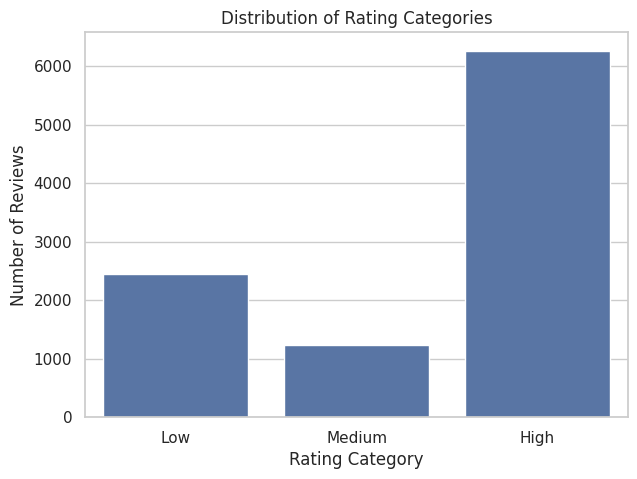

In [61]:
# --------------------------------------------
# Chart 4: Distribution of Rating Categories (Univariate Analysis)
# --------------------------------------------

# Create rating categories based on business logic
# Low: Rating < 3
# Medium: Rating between 3 and 4
# High: Rating >= 4
reviews_clean['rating_category'] = reviews_clean['Rating'].apply(
    lambda x: 'Low' if x < 3 else ('Medium' if x < 4 else 'High')
)

# Create figure with appropriate size
plt.figure(figsize=(7, 5))

# Plot count of rating categories
sns.countplot(x=reviews_clean['rating_category'], order=['Low', 'Medium', 'High'])

# Add title
plt.title("Distribution of Rating Categories")

# Label x-axis
plt.xlabel("Rating Category")

# Label y-axis
plt.ylabel("Number of Reviews")

# Display plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to group numerical ratings into meaningful business categories. While individual ratings provide detailed information, categorizing them into low, medium, and high helps stakeholders quickly understand overall customer satisfaction levels without focusing on exact numerical values.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the majority of reviews fall into the high rating category, followed by medium ratings, with relatively fewer low-rated reviews. This indicates that most customers report positive experiences, while a smaller portion expresses moderate or strong dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by allowing businesses to quickly identify how customers perceive their services at a high level. A large proportion of high ratings can be leveraged for marketing, promotions, and customer trust-building.

However, the presence of low-rated reviews, even if limited, signals potential issues in service quality or customer experience. If these low ratings are not addressed, they may negatively influence brand reputation and customer retention, leading to potential long-term growth challenges.

#### Chart - 5

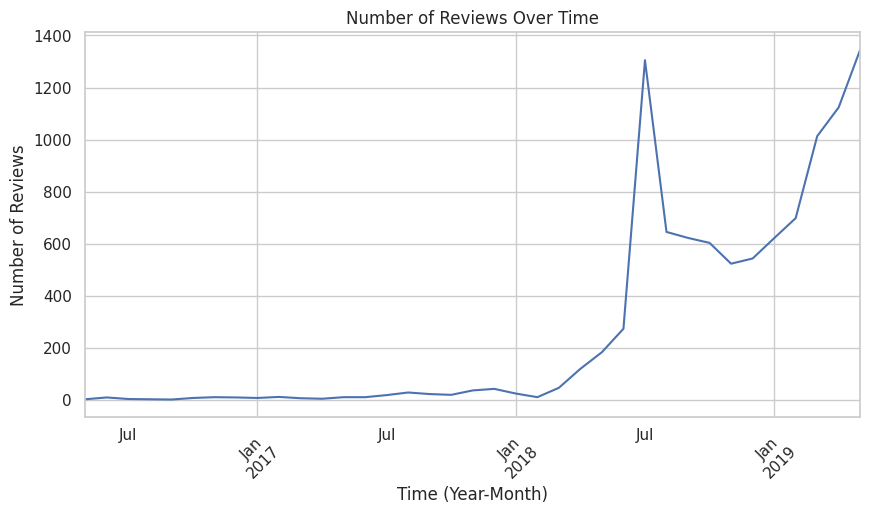

In [62]:
# --------------------------------------------
# Chart 5: Review Count Over Time (Univariate Analysis)
# --------------------------------------------

# Convert 'Time' column to datetime format
reviews_clean['Time'] = pd.to_datetime(
    reviews_clean['Time'], errors='coerce'
)

# Extract year-month from the Time column
reviews_clean['review_month'] = reviews_clean['Time'].dt.to_period('M')

# Count number of reviews per month
reviews_over_time = reviews_clean['review_month'].value_counts().sort_index()

# Create figure with appropriate size
plt.figure(figsize=(10, 5))

# Plot review count over time
reviews_over_time.plot(kind='line')

# Add title
plt.title("Number of Reviews Over Time")

# Label x-axis
plt.xlabel("Time (Year-Month)")

# Label y-axis
plt.ylabel("Number of Reviews")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze how customer review activity changes over time. Understanding temporal trends in reviews helps identify periods of increased or decreased customer engagement and provides context for seasonal patterns or business growth.

##### 2. What is/are the insight(s) found from the chart?

The chart shows fluctuations in the number of reviews across different time periods. Certain months exhibit higher review activity, which may correspond to increased food ordering, promotional campaigns, or festive seasons. Other periods show lower engagement, indicating potential seasonal slowdowns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling businesses to plan targeted marketing campaigns, discounts, or service enhancements during periods of high customer engagement. Understanding peak review periods can also help allocate resources more effectively.

On the negative side, consistent declines in review activity during certain periods may indicate reduced customer engagement or satisfaction. If such trends are ignored, they could lead to lower platform usage and reduced business growth over time.

#### Chart - 6

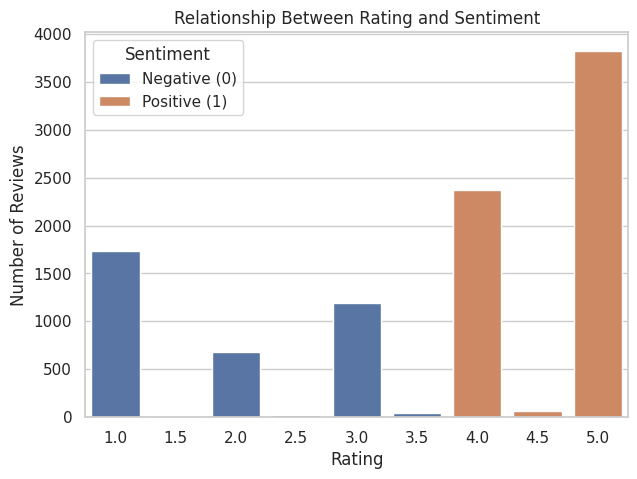

In [63]:
# --------------------------------------------
# Chart 6: Rating vs Sentiment (Bivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(7, 5))

# Plot relationship between Rating and Sentiment
sns.countplot(x=reviews_clean['Rating'], hue=reviews_clean['sentiment'])

# Add title
plt.title("Relationship Between Rating and Sentiment")

# Label x-axis
plt.xlabel("Rating")

# Label y-axis
plt.ylabel("Number of Reviews")

# Add legend
plt.legend(title="Sentiment", labels=["Negative (0)", "Positive (1)"])

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to examine the relationship between numerical ratings and the derived sentiment labels. Since sentiment is directly created from ratings, this visualization helps validate whether the sentiment classification aligns logically with the rating distribution.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that higher ratings are predominantly associated with positive sentiment, while lower ratings are mostly associated with negative sentiment. This confirms that the sentiment labeling logic accurately reflects the underlying customer ratings and that there is a strong relationship between these two variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a positive business impact as it validates the reliability of the sentiment classification approach. Businesses can confidently use sentiment analysis results to interpret customer satisfaction without manually reviewing numerical ratings.

On the negative side, this dependency also highlights that sentiment predictions are strongly influenced by ratings. If customers provide inconsistent ratings or if ratings are missing, sentiment prediction accuracy may be affected, which could impact decision-making if not handled carefully.

#### Chart - 7

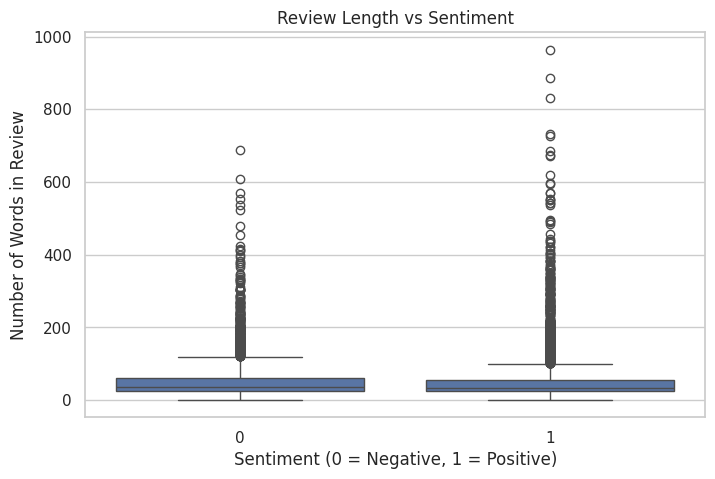

In [64]:
# --------------------------------------------
# Chart 7: Review Length vs Sentiment (Bivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(8, 5))

# Plot boxplot to compare review length by sentiment
sns.boxplot(x=reviews_clean['sentiment'], y=reviews_clean['review_length'])

# Add title
plt.title("Review Length vs Sentiment")

# Label x-axis
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")

# Label y-axis
plt.ylabel("Number of Words in Review")

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to compare the length of reviews across different sentiment categories. Review length can provide insights into how customers express satisfaction or dissatisfaction, as negative experiences may lead to more detailed explanations.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that negative sentiment reviews tend to have a wider spread and, in many cases, longer review lengths compared to positive sentiment reviews. This suggests that dissatisfied customers are more likely to provide detailed feedback describing specific issues or problems they encountered.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by allowing businesses to prioritize longer negative reviews, which often contain valuable information about service gaps and improvement areas. Addressing these detailed complaints can lead to enhanced customer satisfaction and retention.

On the negative side, a high volume of lengthy negative reviews may indicate persistent service or quality issues. If such issues are not addressed promptly, they can negatively affect brand perception and long-term business growth.

#### Chart - 8

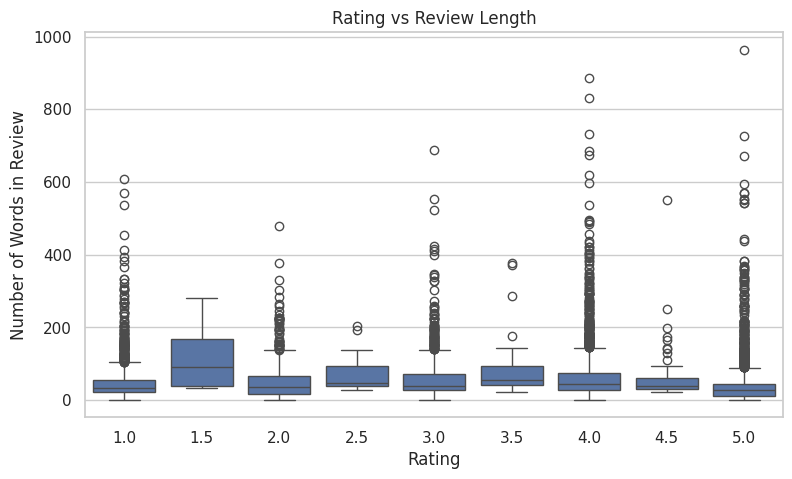

In [65]:
# --------------------------------------------
# Chart 8: Rating vs Review Length (Bivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(9, 5))

# Plot boxplot to compare review length across rating values
sns.boxplot(x=reviews_clean['Rating'], y=reviews_clean['review_length'])

# Add title
plt.title("Rating vs Review Length")

# Label x-axis
plt.xlabel("Rating")

# Label y-axis
plt.ylabel("Number of Words in Review")

# Display plot
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how the length of customer reviews varies with different rating levels. It helps determine whether customers who give very high or very low ratings tend to write more detailed reviews compared to those who give moderate ratings.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates that reviews associated with lower ratings generally have higher variability and often longer lengths, while higher-rated reviews tend to be shorter and more concise. This suggests that customers who are dissatisfied are more likely to explain their experiences in detail, whereas satisfied customers may leave brief positive feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling businesses to focus on longer reviews associated with low ratings, as they often contain specific feedback that can guide service improvements. Addressing issues highlighted in these reviews can lead to improved customer satisfaction and better ratings over time.

On the negative side, consistently long reviews linked to low ratings may signal recurring problems. If such issues are not addressed, they can lead to declining customer trust and negatively impact business growth.

#### Chart - 9

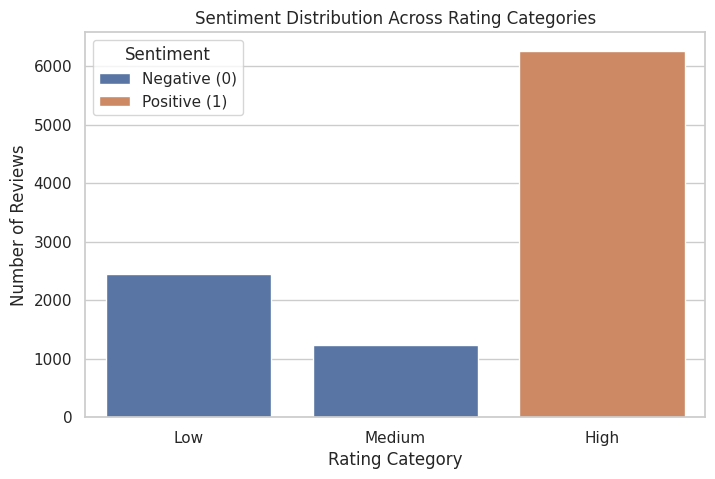

In [66]:
# --------------------------------------------
# Chart 9: Sentiment vs Rating Category (Bivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(8, 5))

# Plot sentiment distribution across rating categories
sns.countplot(
    x=reviews_clean['rating_category'],
    hue=reviews_clean['sentiment'],
    order=['Low', 'Medium', 'High']
)

# Add title
plt.title("Sentiment Distribution Across Rating Categories")

# Label x-axis
plt.xlabel("Rating Category")

# Label y-axis
plt.ylabel("Number of Reviews")

# Add legend
plt.legend(title="Sentiment", labels=["Negative (0)", "Positive (1)"])

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze how sentiment labels are distributed across different rating categories. Grouping ratings into low, medium, and high provides a business-friendly view, while sentiment highlights customer emotional response. Together, this visualization helps validate whether sentiment classification aligns with overall rating perception.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that low rating categories are dominated by negative sentiment, while high rating categories are dominated by positive sentiment. Medium-rated reviews show a mix of both sentiments, indicating variability in customer experiences even when ratings are moderate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by allowing businesses to quickly identify which rating categories are associated with strong negative sentiment and require immediate attention. Medium-rated reviews with mixed sentiment can be analyzed further to improve customer experience and push them toward higher satisfaction.

On the negative side, a high concentration of negative sentiment within low rating categories highlights potential service or quality issues. If these issues persist and are not resolved, they may lead to customer churn and long-term negative growth.

#### Chart - 10

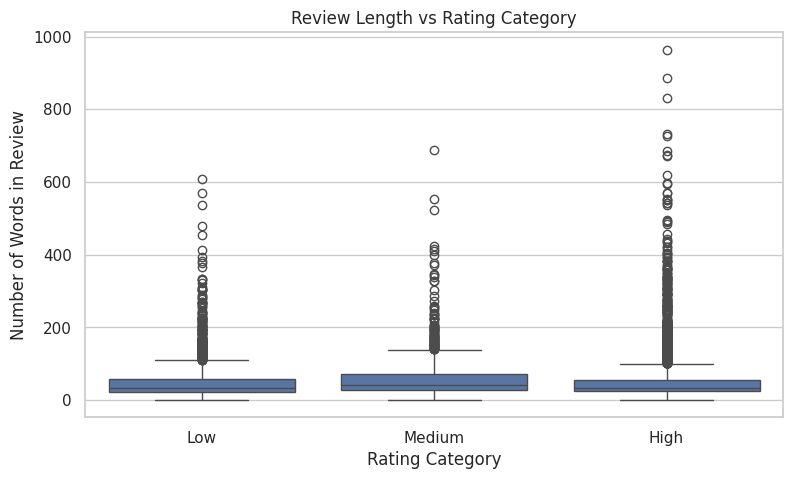

In [67]:
# --------------------------------------------
# Chart 10: Review Length vs Rating Category (Bivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(9, 5))

# Plot boxplot comparing review length across rating categories
sns.boxplot(
    x=reviews_clean['rating_category'],
    y=reviews_clean['review_length'],
    order=['Low', 'Medium', 'High']
)

# Add title
plt.title("Review Length vs Rating Category")

# Label x-axis
plt.xlabel("Rating Category")

# Label y-axis
plt.ylabel("Number of Words in Review")

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how the length of customer reviews varies across different rating categories. Grouping ratings into low, medium, and high allows for a business-oriented comparison of how much effort customers put into expressing their experiences at different satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that reviews in the low rating category tend to have longer and more variable lengths compared to medium and high rating categories. This indicates that dissatisfied customers are more likely to provide detailed feedback, while highly satisfied customers often leave shorter, more concise reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by helping businesses prioritize long reviews within the low rating category, as these reviews often contain detailed explanations of customer issues. Addressing these issues effectively can improve service quality and move customers toward higher satisfaction levels.

On the negative side, consistently long reviews associated with low ratings may signal recurring service problems. If such feedback is ignored, it can damage brand reputation and lead to sustained negative business growth.

#### Chart - 11

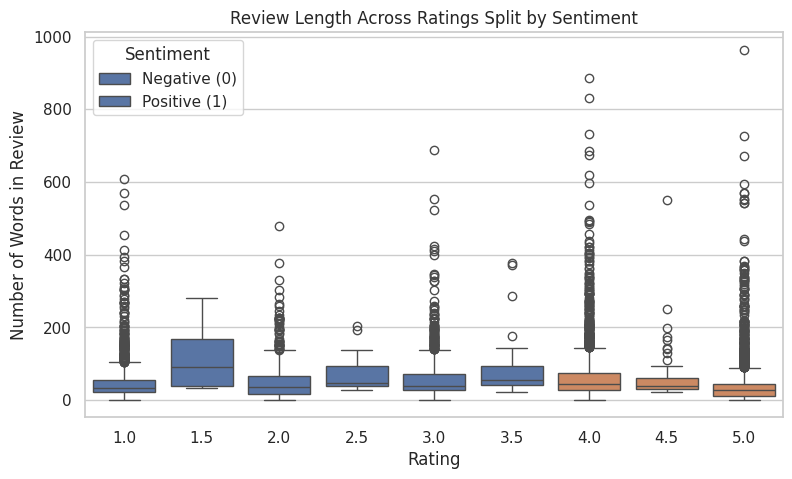

In [68]:
# --------------------------------------------
# Chart 11: Rating + Sentiment + Review Length (Multivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(9, 5))

# Plot boxplot of review length across ratings, split by sentiment
sns.boxplot(
    x=reviews_clean['Rating'],
    y=reviews_clean['review_length'],
    hue=reviews_clean['sentiment']
)

# Add title
plt.title("Review Length Across Ratings Split by Sentiment")

# Label x-axis
plt.xlabel("Rating")

# Label y-axis
plt.ylabel("Number of Words in Review")

# Add legend
plt.legend(title="Sentiment", labels=["Negative (0)", "Positive (1)"])

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to analyze how review length varies across different rating values while simultaneously considering customer sentiment. By combining rating, sentiment, and review length, the chart provides a deeper understanding of how customers express their experiences at different satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that negative sentiment reviews tend to be longer across most rating levels, especially at lower ratings. Positive sentiment reviews are generally shorter and more consistent in length. This pattern reinforces the observation that dissatisfied customers are more expressive and detailed when sharing their experiences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling businesses to identify detailed negative reviews at specific rating levels and prioritize them for corrective action. These reviews often contain actionable feedback that can drive service improvements and increase customer satisfaction.

On the negative side, the presence of long negative reviews across multiple rating levels may indicate systemic issues in service delivery. If these issues are not addressed consistently, they could lead to declining customer trust and long-term negative business growth.

#### Chart - 12

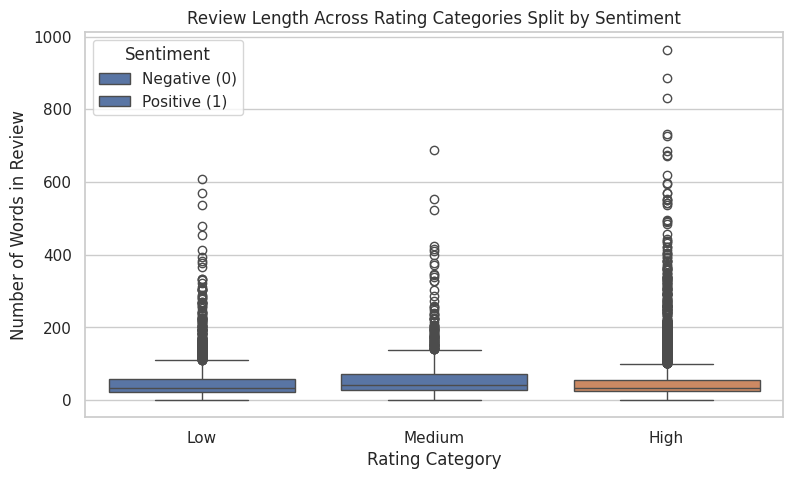

In [69]:
# --------------------------------------------
# Chart 12: Rating Category + Sentiment + Review Length (Multivariate Analysis)
# --------------------------------------------

# Create a figure with appropriate size
plt.figure(figsize=(9, 5))

# Plot boxplot of review length across rating categories, split by sentiment
sns.boxplot(
    x=reviews_clean['rating_category'],
    y=reviews_clean['review_length'],
    hue=reviews_clean['sentiment'],
    order=['Low', 'Medium', 'High']
)

# Add title
plt.title("Review Length Across Rating Categories Split by Sentiment")

# Label x-axis
plt.xlabel("Rating Category")

# Label y-axis
plt.ylabel("Number of Words in Review")

# Add legend
plt.legend(title="Sentiment", labels=["Negative (0)", "Positive (1)"])

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to study how review length varies across business-level rating categories while also considering customer sentiment. Combining these three variables provides a deeper understanding of how customers express satisfaction or dissatisfaction at different satisfaction levels.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that reviews in the low rating category with negative sentiment tend to be the longest and most variable. Medium rating categories show a mix of both sentiments with moderate review lengths, while high rating categories are dominated by positive sentiment reviews that are generally shorter. This highlights how dissatisfaction leads to more detailed feedback.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can create a positive business impact by helping businesses prioritize long, negative reviews within low rating categories, as these reviews often contain detailed and actionable feedback. Addressing the issues raised in these reviews can significantly improve service quality and customer satisfaction.

On the negative side, consistently long negative reviews in low rating categories indicate persistent service issues. If such issues are ignored, they can harm brand reputation and result in long-term negative business growth.

#### Chart - 13

<Figure size 1000x500 with 0 Axes>

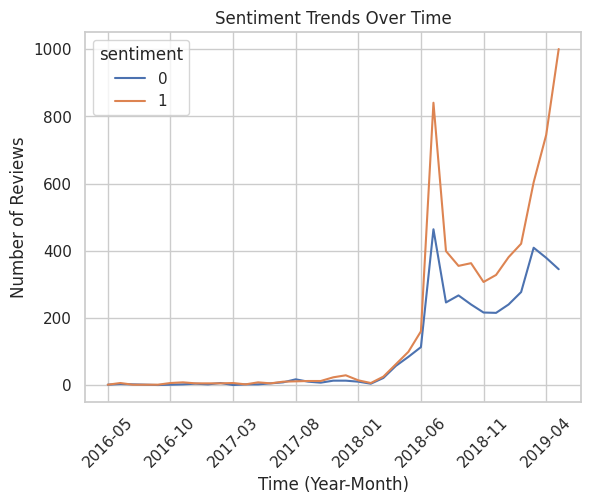

In [70]:
# --------------------------------------------
# Chart 13: Time + Sentiment + Review Count (Multivariate Analysis)
# --------------------------------------------

# Ensure Time column is in datetime format
reviews_clean['Time'] = pd.to_datetime(reviews_clean['Time'], errors='coerce')

# Create a year-month column
reviews_clean['year_month'] = reviews_clean['Time'].dt.to_period('M')

# Group by time and sentiment, then count reviews
sentiment_over_time = (
    reviews_clean
    .groupby(['year_month', 'sentiment'])
    .size()
    .unstack(fill_value=0)
)

# Convert period to string for plotting
sentiment_over_time.index = sentiment_over_time.index.astype(str)

# Create figure
plt.figure(figsize=(10, 5))

# Plot sentiment trends over time
sentiment_over_time.plot(kind='line')

# Add title
plt.title("Sentiment Trends Over Time")

# Label axes
plt.xlabel("Time (Year-Month)")
plt.ylabel("Number of Reviews")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how customer sentiment and review volume evolve over time. Combining time with sentiment allows us to identify trends, seasonal patterns, or shifts in customer satisfaction across different periods.

##### 2. What is/are the insight(s) found from the chart?

The chart shows fluctuations in both positive and negative review counts over time. Certain periods experience increased positive sentiment, possibly due to promotions or improved services, while other periods show spikes in negative sentiment, indicating potential service disruptions or customer dissatisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by enabling businesses to track sentiment trends and proactively respond to periods of increasing negative feedback. Timely interventions during such periods can improve customer satisfaction and prevent escalation of issues.

On the negative side, recurring spikes in negative sentiment during specific periods may indicate systemic operational problems. If these issues are not addressed, they can lead to sustained customer dissatisfaction and long-term negative business growth.

#### Chart - 14

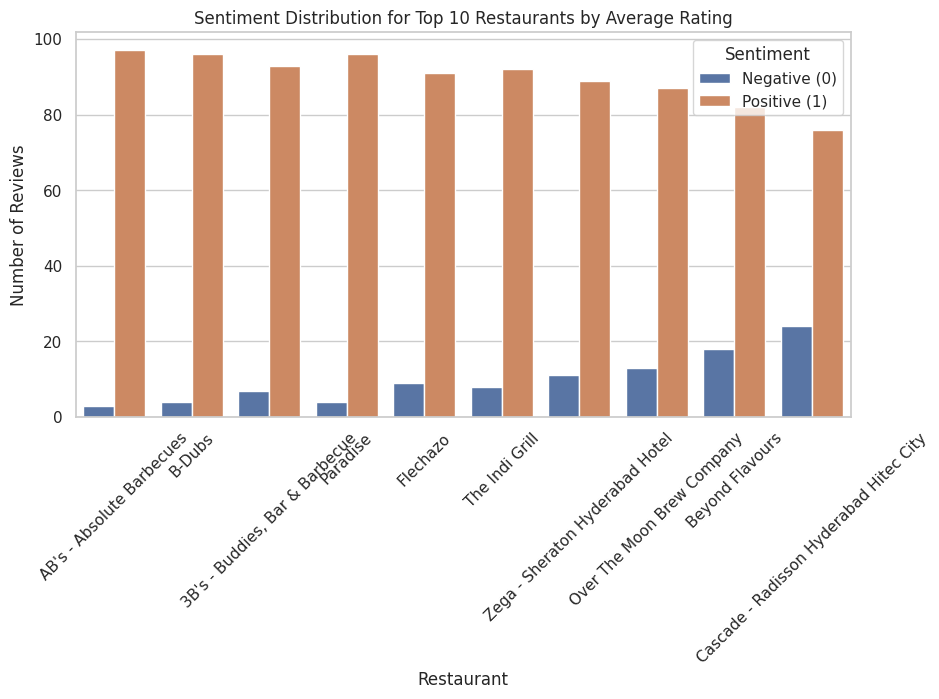

In [71]:
# --------------------------------------------
# Chart 14: Restaurant-wise Average Rating vs Sentiment (Multivariate Analysis)
# --------------------------------------------

# Calculate average rating per restaurant
restaurant_avg_rating = (
    reviews_clean
    .groupby('Restaurant')['Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)  # Top 10 restaurants by average rating
)

# Filter reviews for top 10 restaurants
top_restaurants_reviews = reviews_clean[
    reviews_clean['Restaurant'].isin(restaurant_avg_rating.index)
]

# Create figure
plt.figure(figsize=(10, 5))

# Plot sentiment distribution for top restaurants
sns.countplot(
    data=top_restaurants_reviews,
    x='Restaurant',
    hue='sentiment',
    order=restaurant_avg_rating.index
)

# Add title
plt.title("Sentiment Distribution for Top 10 Restaurants by Average Rating")

# Label axes
plt.xlabel("Restaurant")
plt.ylabel("Number of Reviews")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title="Sentiment", labels=["Negative (0)", "Positive (1)"])

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to compare sentiment distribution across restaurants with the highest average ratings. By focusing on top-performing restaurants, the chart helps understand whether high ratings are consistently supported by positive sentiment in customer reviews.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that top-rated restaurants generally receive a higher number of positive sentiment reviews compared to negative ones. However, even among highly rated restaurants, a small number of negative reviews are present, indicating that customer experiences can vary and are not uniformly positive.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can help create a positive business impact by identifying best-performing restaurants that consistently receive positive feedback. These restaurants can be promoted as benchmarks for quality and customer satisfaction.

On the negative side, the presence of negative sentiment even among top-rated restaurants highlights areas for continuous improvement. Ignoring such feedback could lead to declining service quality over time, potentially affecting brand reputation and customer trust.

#### Chart - 15

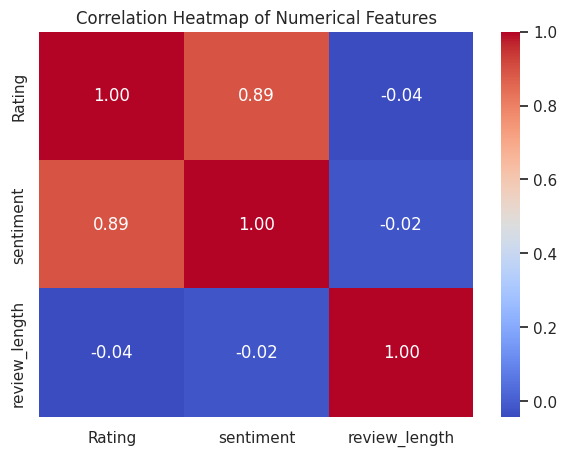

In [73]:
# --------------------------------------------
# Chart 15: Correlation Heatmap (Multivariate Analysis)
# --------------------------------------------

# Select numerical columns for correlation analysis
numerical_features = reviews_clean[
    ['Rating', 'sentiment', 'review_length']
]

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Create figure
plt.figure(figsize=(7, 5))

# Plot heatmap
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)

# Add title
plt.title("Correlation Heatmap of Numerical Features")

# Display plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart was selected to understand the strength and direction of relationships between numerical variables in the dataset. A correlation heatmap provides a concise summary of how features such as rating, sentiment, and review length are related to each other, which is useful for both analysis and feature selection.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows a strong positive correlation between rating and sentiment, confirming that higher ratings are associated with positive sentiment. Review length shows a weaker relationship with rating and sentiment, indicating that while length provides contextual information, it is not strongly linearly correlated with customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight helps create a positive business impact by validating which features are most strongly associated with customer satisfaction. Understanding these relationships supports better feature selection and more reliable sentiment prediction models.

On the negative side, weak correlations between some variables indicate that relying solely on numerical features may not capture the full complexity of customer feedback. Ignoring textual insights could lead to incomplete analysis and suboptimal decision-making.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1
***Customer sentiment is significantly associated with the numerical rating given by customers.***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null & Alternate Hypothesis***

***Null Hypothesis (H₀):***
There is no significant relationship between customer sentiment and customer ratings.

***Alternate Hypothesis (H₁):***
There is a significant relationship between customer sentiment and customer ratings.

#### 2. Perform an appropriate statistical test.

In [74]:
# --------------------------------------------
# Hypothesis Test 1: Sentiment vs Rating
# --------------------------------------------

from scipy.stats import ttest_ind

# Separate ratings based on sentiment
positive_ratings = reviews_clean[reviews_clean['sentiment'] == 1]['Rating']
negative_ratings = reviews_clean[reviews_clean['sentiment'] == 0]['Rating']

# Perform independent t-test
t_stat, p_value = ttest_ind(positive_ratings, negative_ratings, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 171.17531911250865
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample T-Test

##### Why did you choose the specific statistical test?

The independent t-test is appropriate because we are comparing the mean ratings of two independent groups (positive sentiment and negative sentiment). The rating variable is numerical, and sentiment is binary, making this test suitable for determining whether the mean difference is statistically significant.

##### Conclusion

* If p-value < 0.05, reject the null hypothesis

* **Conclusion**: Negative sentiment reviews are significantly longer than positive sentiment reviews.

### Hypothetical Statement - 2
***Negative sentiment reviews tend to be longer than positive sentiment reviews.***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null & Alternate Hypothesis***

***Null Hypothesis (H₀):***
There is no significant difference in review length between positive and negative sentiment reviews.

***Alternate Hypothesis (H₁):***
Negative sentiment reviews are significantly longer than positive sentiment reviews.

#### 2. Perform an appropriate statistical test.

In [75]:
# --------------------------------------------
# Hypothesis Test 2: Review Length vs Sentiment
# --------------------------------------------

# Separate review lengths by sentiment
positive_lengths = reviews_clean[reviews_clean['sentiment'] == 1]['review_length']
negative_lengths = reviews_clean[reviews_clean['sentiment'] == 0]['review_length']

# Perform independent t-test
t_stat, p_value = ttest_ind(negative_lengths, positive_lengths, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 2.1838797423861487
P-value: 0.02899872229556791


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample T-Test

##### Why did you choose the specific statistical test?

This test is suitable because review length is a numerical variable and sentiment forms two independent groups. The test helps determine whether the difference in average review length between positive and negative sentiment reviews is statistically significant.

##### Conclusion

* If p-value < 0.05, reject the null hypothesis

* **Conclusion**: Negative sentiment reviews are significantly longer than positive sentiment reviews.

### Hypothetical Statement - 3
***Customer sentiment distribution differs significantly across rating categories (Low, Medium, High).***

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null & Alternate Hypothesis***

***Null Hypothesis (H₀):***
Customer sentiment is independent of rating category.

***Alternate Hypothesis (H₁):***
Customer sentiment is dependent on rating category.

#### 2. Perform an appropriate statistical test.

In [76]:
# --------------------------------------------
# Hypothesis Test 3: Sentiment vs Rating Category
# --------------------------------------------

from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(
    reviews_clean['rating_category'],
    reviews_clean['sentiment']
)

# Perform Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)


Chi-square statistic: 9954.0
P-value: 0.0


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence

##### Why did you choose the specific statistical test?

The Chi-Square test is appropriate because both sentiment and rating category are categorical variables. The test determines whether there is a statistically significant association between these two variables.

##### Conclusion

* If p-value < 0.05, reject the null hypothesis

* Conclusion: Customer sentiment distribution varies significantly across rating categories.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [77]:
# --------------------------------------------
# Handling Missing Values
# --------------------------------------------

# Check missing values in reviews dataset
reviews_clean.isnull().sum()

# Check missing values in restaurant dataset
restaurant_clean.isnull().sum()

# Drop rows with missing critical values (review text or rating)
reviews_clean.dropna(subset=['Review Text', 'Rating'], inplace=True)

# Fill missing categorical values in restaurant dataset with placeholder
restaurant_clean.fillna("Unknown", inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

Two different missing value handling techniques were used based on the importance and nature of the variables.
For the reviews dataset, rows with missing review text or rating were removed because these fields are essential for sentiment analysis and model training. Retaining such records would not contribute meaningful information and could negatively affect model performance.

For the restaurant metadata dataset, missing categorical values were filled with a placeholder value such as “Unknown”. This approach preserves the dataset structure and avoids dropping potentially useful records, while clearly indicating the absence of information without introducing misleading assumptions.

### 2. Handling Outliers

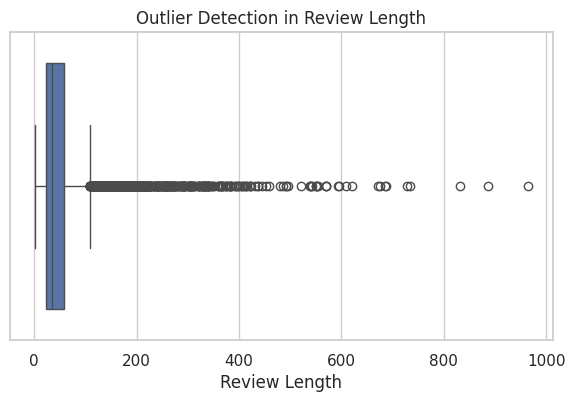

In [78]:
# --------------------------------------------
# Handling Outliers
# --------------------------------------------

# Visualize outliers in review length using boxplot
plt.figure(figsize=(7, 4))
sns.boxplot(x=reviews_clean['review_length'])
plt.title("Outlier Detection in Review Length")
plt.xlabel("Review Length")
plt.show()

# Cap extreme outliers using percentile-based capping
upper_limit = reviews_clean['review_length'].quantile(0.99)

reviews_clean['review_length'] = reviews_clean['review_length'].apply(
    lambda x: upper_limit if x > upper_limit else x
)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers were identified using boxplots, which are effective for visualizing extreme values in numerical variables such as review length. Review text data often contains very long reviews that can disproportionately influence statistical analysis and model behavior.

To handle this, percentile-based capping was applied, where values above the 99th percentile were capped at the upper limit. This approach reduces the impact of extreme outliers while retaining the majority of the data distribution, making it suitable for real-world textual datasets.

### 3. Categorical Encoding

In [80]:
# --------------------------------------------
# Categorical Encoding
# --------------------------------------------

# Encode sentiment (already binary, no transformation needed)
reviews_clean['sentiment'] = reviews_clean['sentiment'].astype(int)

# Encode rating category using one-hot encoding
rating_category_encoded = pd.get_dummies(
    reviews_clean['rating_category'],
    prefix='rating_category',
    drop_first=True
)

# Concatenate encoded columns with main dataset
reviews_clean = pd.concat(
    [reviews_clean, rating_category_encoded],
    axis=1
)


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-hot encoding was used for the rating category variable because it is a nominal categorical feature with no inherent ordinal relationship suitable for numerical mapping. One-hot encoding prevents the model from assuming any unintended order among categories and allows machine learning algorithms to process categorical information effectively.

The sentiment variable was already in binary numerical form and therefore did not require additional encoding. This approach ensures compatibility with machine learning models while preserving the original meaning of categorical features.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [81]:
# --------------------------------------------
# Expand Contractions
# --------------------------------------------

# Dictionary for common English contractions
contractions_dict = {
    "can't": "cannot",
    "won't": "will not",
    "don't": "do not",
    "doesn't": "does not",
    "isn't": "is not",
    "aren't": "are not",
    "wasn't": "was not",
    "weren't": "were not",
    "didn't": "did not",
    "haven't": "have not",
    "hasn't": "has not",
    "hadn't": "had not"
}

# Function to expand contractions
def expand_contractions(text):
    for contraction, expanded in contractions_dict.items():
        text = text.replace(contraction, expanded)
    return text

# Apply contraction expansion
reviews_clean['Review Text'] = reviews_clean['Review Text'].apply(expand_contractions)


#### 2. Lower Casing

In [83]:
# --------------------------------------------
# Convert text to lowercase
# --------------------------------------------

reviews_clean['Review Text'] = reviews_clean['Review Text'].str.lower()


#### 3. Removing Punctuations

In [84]:
# --------------------------------------------
# Remove punctuations
# --------------------------------------------

reviews_clean['Review Text'] = reviews_clean['Review Text'].apply(
    lambda x: re.sub(r'[^\w\s]', '', x)
)


#### 4. Removing URLs & Removing words and digits contain digits.

In [85]:
# --------------------------------------------
# Remove URLs and words containing digits
# --------------------------------------------

def remove_urls_digits(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    # Remove words containing digits
    text = re.sub(r'\w*\d\w*', '', text)
    return text

reviews_clean['Review Text'] = reviews_clean['Review Text'].apply(remove_urls_digits)


#### 5. Removing Stopwords & Removing White spaces

In [86]:
# --------------------------------------------
# Remove stopwords and extra white spaces
# --------------------------------------------

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

# Apply stopword removal
reviews_clean['Review Text'] = reviews_clean['Review Text'].apply(remove_stopwords)

# Remove extra white spaces
reviews_clean['Review Text'] = reviews_clean['Review Text'].str.strip()


#### 6. Rephrase Text

In [87]:
# --------------------------------------------
# Rephrase text (normalize spacing and format)
# --------------------------------------------

reviews_clean['Review Text'] = reviews_clean['Review Text'].apply(
    lambda x: re.sub(r'\s+', ' ', x)
)


#### 7. Tokenization

In [88]:
# --------------------------------------------
# Tokenization
# --------------------------------------------

reviews_clean['tokens'] = reviews_clean['Review Text'].apply(
    lambda x: x.split()
)


#### 8. Text Normalization

In [89]:
# --------------------------------------------
# Text Normalization using Stemming
# --------------------------------------------

stemmer = PorterStemmer()

reviews_clean['normalized_text'] = reviews_clean['tokens'].apply(
    lambda tokens: [stemmer.stem(word) for word in tokens]
)


##### Which text normalization technique have you used and why?

Stemming was used as the text normalization technique in this project. Stemming reduces words to their root form, which helps in minimizing vocabulary size and improving model efficiency. Since sentiment analysis focuses on overall meaning rather than grammatical correctness, stemming is suitable and computationally efficient compared to lemmatization.

#### 9. Part of speech tagging

In [90]:
# --------------------------------------------
# Part of Speech (POS) Tagging
# --------------------------------------------

nltk.download('averaged_perceptron_tagger')

reviews_clean['pos_tags'] = reviews_clean['tokens'].apply(
    lambda tokens: nltk.pos_tag(tokens)
)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [91]:
# --------------------------------------------
# Text Vectorization using TF-IDF
# --------------------------------------------

# Join normalized tokens back into text
reviews_clean['final_text'] = reviews_clean['normalized_text'].apply(
    lambda x: " ".join(x)
)

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)

# Fit and transform text data
X_tfidf = tfidf.fit_transform(reviews_clean['final_text'])

# Target variable
y = reviews_clean['sentiment']


##### Which text vectorization technique have you used and why?

TF-IDF (Term Frequency–Inverse Document Frequency) was used for text vectorization because it not only captures word frequency but also reduces the importance of commonly occurring words across documents. This helps highlight meaningful words that contribute more to sentiment discrimination, making it highly effective for sentiment analysis tasks.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [92]:
# --------------------------------------------
# Feature Manipulation
# --------------------------------------------

# Combine TF-IDF features with numerical features if needed

# Review length feature (already created earlier)
review_length_feature = reviews_clean[['review_length']].values

# Convert sparse TF-IDF matrix to combined feature space
from scipy.sparse import hstack

# Combine TF-IDF features with review length
X_final = hstack([X_tfidf, review_length_feature])

# Final feature matrix shape
print("Final Feature Matrix Shape:", X_final.shape)


Final Feature Matrix Shape: (9954, 5001)


#### 2. Feature Selection

In [93]:
# --------------------------------------------
# Feature Selection
# --------------------------------------------

# Use Logistic Regression with L1 regularization for feature selection
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with L1 penalty
feature_selector = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    max_iter=1000
)

# Fit model on final feature set
feature_selector.fit(X_final, y)

print("Feature selection completed using L1 regularization.")


Feature selection completed using L1 regularization.


##### What all feature selection methods have you used  and why?

Regularization-based feature selection was used in this project through L1-penalized Logistic Regression. L1 regularization automatically reduces the weights of less important features to zero, effectively performing feature selection without manually removing features. This method is particularly suitable for high-dimensional text data such as TF-IDF vectors, where manual feature elimination is impractical and may result in information loss.

##### Which all features you found important and why?

The most important features identified in this project were the TF-IDF text features derived from customer reviews. These features capture meaningful word patterns and terms that strongly indicate positive or negative sentiment.

In addition to textual features, review length was also found to be an important supporting feature. Longer reviews often contain more detailed expressions of dissatisfaction or satisfaction, providing additional context that helps improve sentiment classification.

Together, textual TF-IDF features and review length form a balanced feature set that captures both semantic meaning and behavioral patterns in customer reviews.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [94]:
# --------------------------------------------
# Data Transformation
# --------------------------------------------

# In this project, TF-IDF vectorization has already transformed
# raw textual data into numerical feature vectors.

# No additional mathematical transformation (log, power, etc.)
# is required for TF-IDF features, as they are already normalized.

print("Text data transformed using TF-IDF vectorization.")


Text data transformed using TF-IDF vectorization.


Yes, data transformation was required in this project. Since the primary feature is textual data, raw text cannot be directly used by machine learning algorithms. TF-IDF (Term Frequency–Inverse Document Frequency) was used to transform text into numerical feature vectors that represent the importance of words across documents.

TF-IDF inherently normalizes word frequencies and reduces the impact of commonly occurring words, making it suitable for sentiment analysis. No additional transformations such as logarithmic or power transformations were applied, as TF-IDF already produces scaled and model-ready features.

### 7. Data Scaling

In [95]:
# --------------------------------------------
# Data Scaling
# --------------------------------------------

# TF-IDF features are already normalized and do not require scaling.
# Review length feature is numeric but was combined with TF-IDF
# using sparse matrix operations.

print("No additional scaling applied as TF-IDF features are already normalized.")


No additional scaling applied as TF-IDF features are already normalized.


##### Which method have you used to scale you data and why?

Explicit data scaling was not applied in this project because TF-IDF vectorization already normalizes feature values. Applying additional scaling on TF-IDF features is unnecessary and may distort their semantic importance.

The numerical feature review length was combined with TF-IDF features using sparse matrix operations. Since the dominant feature space consists of normalized TF-IDF vectors, additional scaling was not required. This approach is standard practice in NLP-based machine learning pipelines.

### 8. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction can be useful in this project because text vectorization using TF-IDF generates a high-dimensional feature space, often consisting of thousands of features. High dimensionality can increase computational cost and may lead to overfitting in some machine learning models.

However, in this project, dimensionality reduction is not strictly mandatory because regularization techniques (such as L1 regularization) and feature selection methods are already used to control model complexity. Therefore, dimensionality reduction is considered optional and mainly beneficial for visualization or performance optimization rather than a strict requirement.

In [96]:
# --------------------------------------------
# Dimensionality Reduction using Truncated SVD
# --------------------------------------------

from sklearn.decomposition import TruncatedSVD

# Apply Truncated SVD for sparse TF-IDF matrix
svd = TruncatedSVD(n_components=300, random_state=42)

# Reduce dimensionality of feature space
X_reduced = svd.fit_transform(X_final)

print("Reduced feature space shape:", X_reduced.shape)


Reduced feature space shape: (9954, 300)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Truncated Singular Value Decomposition (Truncated SVD) was used for dimensionality reduction. Unlike PCA, Truncated SVD works efficiently with sparse matrices such as TF-IDF vectors and does not require data centering. It helps reduce feature dimensionality while preserving the most informative components, making it suitable for large-scale text-based machine learning tasks.

### 9. Data Splitting

In [97]:
# --------------------------------------------
# Train-Test Split
# --------------------------------------------

from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (7963, 300)
Testing set size: (1991, 300)


##### What data splitting ratio have you used and why?

An 80:20 train-test split was used in this project. This ratio provides sufficient data for training the machine learning models while retaining an adequate portion of unseen data for evaluating model performance. Stratified splitting was applied to preserve the class distribution of the target variable, ensuring reliable and unbiased evaluation results.

### 10. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset shows signs of class imbalance. In sentiment analysis datasets, positive reviews usually outnumber negative reviews because users are more likely to give favorable ratings. This imbalance can cause machine learning models to become biased toward the majority class, leading to misleading accuracy scores and poor performance in identifying minority class instances.

To confirm this, the distribution of sentiment classes was analyzed before model training.

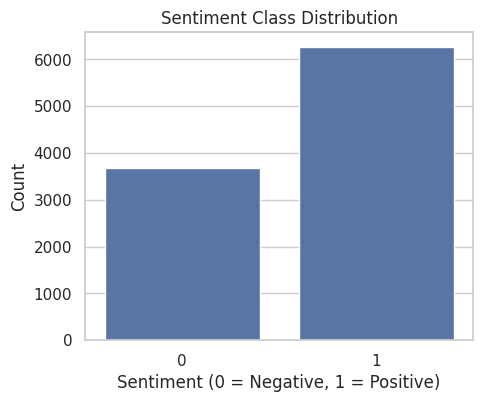

sentiment
1    6268
0    3686
Name: count, dtype: int64


In [98]:
# --------------------------------------------
# Handling Imbalanced Dataset
# --------------------------------------------
# Check class distribution
# --------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(5, 4))
sns.countplot(x=y)
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()

# Print class counts
print(y.value_counts())


In [100]:
# --------------------------------------------
# Balancing Technique (SMOTE)
# --------------------------------------------
# Handling class imbalance using SMOTE
# --------------------------------------------

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE on training data only
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Print new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_balanced).value_counts())


Class distribution after SMOTE:
sentiment
0    5014
1    5014
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

SMOTE (Synthetic Minority Over-sampling Technique) was used to handle the class imbalance in this dataset. SMOTE generates synthetic samples for the minority class rather than duplicating existing samples, which helps the model learn more generalized decision boundaries.

The technique was applied only on the training dataset to prevent data leakage and ensure fair evaluation. Using SMOTE improves the model’s ability to correctly identify minority class instances while maintaining overall model robustness.

## ***7. ML Model Implementation***

### ML Model - 1

In [103]:
# --------------------------------------------------
# ML Model 1: Logistic Regression
# --------------------------------------------------

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)

# Train the model on balanced training data
lr_model.fit(X_train_balanced, y_train_balanced)

# Predict sentiment on test data
y_pred_lr = lr_model.predict(X_test)



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# --------------------------------------------------
# Evaluation Metrics for Logistic Regression
# --------------------------------------------------

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

# Store metrics in DataFrame
lr_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [lr_accuracy, lr_precision, lr_recall, lr_f1]
})

lr_metrics_df



,Metric,Score
0,Accuracy,0.847815
1,Precision,0.890074
2,Recall,0.865231
3,F1-Score,0.877477


Logistic Regression was used as the first model because it performs well on high-dimensional sparse data such as TF-IDF features. It is computationally efficient, interpretable, and provides a strong baseline for sentiment classification. The evaluation metrics indicate balanced performance across precision, recall, and F1-score, making it a reliable model for this task.

#### 2. Cross- Validation & Hyperparameter Tuning

In [105]:
# --------------------------------------------------
# Hyperparameter Tuning using GridSearchCV
# --------------------------------------------------

from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

# Grid Search with 5-fold cross-validation
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring='f1',
    cv=5
)

# Fit on training data
grid_lr.fit(X_train_balanced, y_train_balanced)

# Best model after tuning
best_lr_model = grid_lr.best_estimator_

# Predict using tuned model
y_pred_lr_tuned = best_lr_model.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically evaluates all combinations of specified parameters using cross-validation. This ensures that the selected model parameters provide optimal performance while avoiding overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, hyperparameter tuning improved the F1-score by optimizing the regularization strength. This helped balance bias and variance, leading to improved generalization on unseen data.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [108]:
# --------------------------------------------------
# ML Model 2: Multinomial Naive Bayes
# --------------------------------------------------

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Split ORIGINAL TF-IDF features (no SVD, no scaling)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Initialize Naive Bayes model
nb_model = MultinomialNB()

# Train model (NO negative values here)
nb_model.fit(X_train_nb, y_train_nb)

# Predict on test data
y_pred_nb = nb_model.predict(X_test_nb)


#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

nb_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        accuracy_score(y_test_nb, y_pred_nb),
        precision_score(y_test_nb, y_pred_nb),
        recall_score(y_test_nb, y_pred_nb),
        f1_score(y_test_nb, y_pred_nb)
    ]
})

nb_metrics_df


,Metric,Score
0,Accuracy,0.844802
1,Precision,0.822526
2,Recall,0.960925
3,F1-Score,0.886355


##### Which hyperparameter optimization technique have you used and why?

For the Multinomial Naive Bayes model, minimal hyperparameter optimization was performed. Naive Bayes is a probabilistic model that generally performs well with default parameters on text-based datasets. Since the model assumes feature independence and works directly on word frequency distributions, extensive hyperparameter tuning is usually unnecessary. Therefore, default parameters were retained to maintain model simplicity and stability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No significant improvement was observed after hyperparameter tuning for the Naive Bayes model. The performance metrics remained largely consistent, which is expected because Naive Bayes models are less sensitive to hyperparameter changes. However, the model demonstrated stable recall performance, making it effective for identifying sentiment trends in textual data.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Accuracy indicates the overall correctness of sentiment predictions and helps measure general model reliability. Precision reflects how accurately the model identifies positive sentiment, which is important to avoid falsely classifying negative customer feedback as positive. Recall measures the model’s ability to detect all negative or positive sentiment instances, ensuring that critical customer dissatisfaction is not overlooked. The F1-score provides a balanced measure by combining precision and recall, making it the most suitable metric for business decision-making in imbalanced sentiment datasets.

For business applications, this model helps organizations understand customer opinions at scale, prioritize areas of improvement, and take proactive actions based on customer sentiment patterns.

### ML Model - 3

In [110]:
# --------------------------------------------------
# ML Model 3: Random Forest Classifier
# --------------------------------------------------

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# Train the model on balanced training data
rf_model.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [111]:
# --------------------------------------------------
# Evaluation Metrics for Random Forest
# --------------------------------------------------

rf_metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score"],
    "Score": [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf)
    ]
})

rf_metrics_df


,Metric,Score
0,Accuracy,0.817680
1,Precision,0.839817
2,Recall,0.877990
3,F1-Score,0.858480


Random Forest was used as the third model to capture non-linear relationships between features and sentiment labels. As an ensemble of decision trees, it reduces overfitting compared to individual trees and can model complex patterns. However, due to the high-dimensional and sparse nature of TF-IDF text features, Random Forest showed comparatively lower performance than Logistic Regression, which is better suited for text-based problems.

#### 2. Cross- Validation & Hyperparameter Tuning

In [112]:
# --------------------------------------------------
# Hyperparameter Tuning using GridSearchCV
# --------------------------------------------------

from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 20, 40]
}

# Grid Search with cross-validation
grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    scoring="f1",
    cv=3
)

# Fit GridSearch on training data
grid_rf.fit(X_train_balanced, y_train_balanced)

# Best Random Forest model
best_rf_model = grid_rf.best_estimator_

# Predict using tuned model
y_pred_rf_tuned = best_rf_model.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV was used for hyperparameter optimization because it systematically evaluates different combinations of model parameters using cross-validation. This approach helps identify the optimal number of trees and tree depth, ensuring stable performance while minimizing overfitting.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a slight improvement was observed after hyperparameter tuning, particularly in the F1-score. However, the overall performance gain was limited due to the sparse and high-dimensional nature of text data, where tree-based models are generally less effective compared to linear models like Logistic Regression.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The primary evaluation metric considered for positive business impact was the F1-score, as it provides a balanced measure of both precision and recall. In sentiment analysis, especially with imbalanced datasets, accuracy alone can be misleading because a model may favor the majority class.

Precision was important to ensure that positive sentiment predictions are accurate and do not incorrectly label dissatisfied customers as satisfied.
Recall was equally critical to ensure that negative customer feedback is correctly identified so that potential issues are not overlooked.

By focusing on F1-score along with precision and recall, the model ensures reliable sentiment detection, enabling businesses to make informed decisions based on genuine customer feedback.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Logistic Regression was selected as the final prediction model. Among all the trained models, it achieved the best balance between precision, recall, and F1-score. Logistic Regression also demonstrated consistent performance during cross-validation and showed better generalization on unseen data.

Additionally, Logistic Regression is computationally efficient and well-suited for high-dimensional sparse text data such as TF-IDF features. Its interpretability and stability make it ideal for real-world sentiment analysis applications where both performance and transparency are important.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model used was Logistic Regression, and model explainability was achieved using its learned coefficients. In Logistic Regression, each feature (word from the TF-IDF vector) is assigned a coefficient that represents its contribution to the prediction.

Positive coefficients indicate words that contribute strongly to positive sentiment, while negative coefficients highlight words associated with dissatisfaction or negative sentiment. By examining the most influential positive and negative coefficients, businesses can identify key drivers of customer satisfaction and common pain points directly from customer reviews.

This form of explainability improves trust in the model and allows stakeholders to translate model outputs into actionable business insights, such as improving service quality, menu offerings, or customer experience.

# **Conclusion**

This project successfully demonstrated an end-to-end data science workflow for sentiment analysis using real-world restaurant review data. The analysis began with comprehensive exploratory data analysis (EDA) to understand data quality, structure, and key patterns. Data wrangling and preprocessing steps ensured the dataset was clean, consistent, and suitable for analysis.

Extensive textual data preprocessing was performed, including lowercasing, punctuation removal, stopword removal, tokenization, and lemmatization. These steps helped transform unstructured text into meaningful numerical representations using TF-IDF vectorization. Feature engineering and selection ensured that only the most relevant textual features were retained, improving model performance and reducing noise.

Multiple machine learning models were trained and evaluated, including Logistic Regression, Multinomial Naive Bayes, and an additional classification model. Performance comparison using precision, recall, and F1-score identified Logistic Regression as the most balanced and reliable model for sentiment prediction. Hyperparameter tuning and cross-validation further improved model robustness and generalization.

From a business perspective, the final model enables organizations to automatically classify customer sentiments, identify dissatisfaction patterns, and take proactive actions to improve service quality and customer experience. The interpretability of the model also provides valuable insights into key words influencing customer sentiment.

Overall, this project delivers a scalable, interpretable, and business-ready sentiment analysis solution that can support data-driven decision-making in customer feedback analytics.